# WeRateDogs

WeRateDogs is a hilarious twitter account that rates peoples dogs. Created in 2015 by college student Matt Nelson, the page basically asks people to send pictures of their dogs then tweets selected photos rating along with a funny comment. 


In this project I will be using WeRateDogs data primarily for data wrangling, which consists of:
1. Gathering Data
2. Assessing Data
3. Cleaning Data 

I start off by gathering the data from three different resources: a csv file (loaded in df dataframe) , tsv file (loaded in image_predict dataframe) downloaded using Requests library and using Twitter API to obtain each tweet's JSON data using Tweepy library (loaded in tweet_info dataframe). 

###  1. Gathering Data

In [1]:
#start by importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time

import tweepy
from tweepy import OAuthHandler

from timeit import default_timer as timer


In [2]:
#read csv file
df= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#look at the database to take a quick look 
df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#to download tsv file from Udacity server using request library
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response= requests.get(url)

with open('image_predictions.tsv','wb') as file:
    file.write(response.content)
    
image_predict= pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
#to take a quick look at the database 
image_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#accessing Twitter API using tweepy
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)



In [7]:
#to know how many datapoints are obatined 
#and know the total number of count in the next code
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [8]:
#used the tweet IDs to query the Twitter API for each tweet's JSON data using Python's Tweepy library 
#and stored each tweet's entire set of JSON data in a file called tweet_json.txt

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [9]:
#collect the json data into tweets_data 
tweets_data= []

tweet_file= open('tweet_json.txt','r')

for line in tweet_file:
    try:
        tweet= json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [10]:
#create a pandas dataframe 
tweet_info= pd.DataFrame()

In [11]:
#getting retweet_count, favorite_count and id from tweets_data into tweet_info dataframe
tweet_info['id']= list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count']= list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count']= list(map(lambda tweet: tweet['favorite_count'],tweets_data))

In [12]:
#taking a quick look at the data obtained 
tweet_info.head(5)

#success!

,id,retweet_count,favorite_count
0,892420643555336193,8356,38175
1,892177421306343426,6173,32740
2,891815181378084864,4085,24650
3,891689557279858688,8500,41509
4,891327558926688256,9191,39681


### Now that we have successfully gathered our data, lets take a more thorough look in our second part of our data wrangling process.

### 2. Assessing the data

In [13]:
#looking at the df_twitter dataframe
df.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Looking at the table above, we can see that we have alot of information and not much of it is useful for us. We can easily remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp columns and rating_numerator and rating_denominator can be replaced with a "ratings" column that is the divion of the former two columns. 

In addition, we only want non-retweeted tweets so we can also remove the retweeted_status_id columns after having  filtered out datapoints which retweeted_status_id is NaN.

And finally having one column addressing the stage of the dog instead of having all four columns(doggo, floofer, pupper, puppo)

Let's look at the names column. 

In [14]:
#looking at all the different names in our dataframe
df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
the             8
Sadie           8
an              7
Buddy           7
Daisy           7
Toby            7
Bailey          7
Rusty           6
Milo            6
Dave            6
Jack            6
Bella           6
Koda            6
Jax             6
Oscar           6
Stanley         6
Leo             6
Scout           6
George          5
             ... 
Cora            1
Obi             1
Thor            1
Dook            1
Ralphy          1
Simba           1
Striker         1
Naphaniel       1
Nugget          1
Tug             1
Mabel           1
Bronte          1
Benny           1
Christoper      1
Ronnie          1
Iggy            1
his             1
Nida            1
Kody            1
Stuart          1
Tebow           1
Remus           1
Samsom          1
Marlee          1
Poppy     

We can see that "a","an","the","None" are not proper names are probably mistakes. We would need to change it to NaN. 

Now lets take a closer look at the format of the data in the df dataframe.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

We can see a couple datatypes that would need to be changed: tweet_id would need to be changed from integer into a string format and timestamp from string into datatime.

In [16]:
#now looking at our second dataframe 
image_predict.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


We can see here that we have too many columns to tell us the most-likely breed of the dog. By removing p1, p2 and p3 and have a prediced_breed column and a predicted_conf column (to replace p1_conf, p2_conf, p3_conf) would not only be simpler to conclude but it would also be easy on the eyes. 

In [17]:
#looking at the number of datapoint we have here
len(image_predict)

2075

The total number of datapoints in the df dataframe is 2356 while here we have 2075. This tells us that not all tweet_id have an associated image. Those missing an image would have to be dropped. 

In [18]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


tweet_id here would also need to be changed into a string.

In [19]:
#looking at our third dataframe 
tweet_info.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8356,38175
1,892177421306343426,6173,32740
2,891815181378084864,4085,24650
3,891689557279858688,8500,41509
4,891327558926688256,9191,39681


In [20]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


We would have to change the name of id column into tweet_id (for merging purposes) and datatype changed into string.

### To Summarize:

Highlights of both quality and tidiness issues that we've come across so far :

Quality, which relates to content issues (completeness, validity, accuracy, consistency):

1. ‘in_reply_to_status_id’, ‘in_reply_to_user_id’, ‘retweeted_status_id’, ‘retweeted_statis_user_id’ are columns that are not useful to us and need to be dropped.
2.	We only need retweeted_status_id is NAN, drop everything else
3.	Replace the ‘doggo','floofer','pupper','puppo' columns with a ‘stage’ column
4.	Some of the dog names are set as “a” and “an”. This should be changed into NaN.
5.	Tweet_id is an integer and should be a string in all three datasets
6.	Timestamp is set as a string and should be changed into datetime
7.	Most possible breed column with a prediction confidence column should be created to replace the several breed prediction columns
8.	Drop ratings without images

Tidiness, which relates to structural issues: 
1.	All three databases should be merged together (df, image_predict and tweet_info) into one database
2.	Rating numerator and denominator should be in one rating column (numerator/denominator)




### 3.  Cleaning Our Data


Now that we've assessed our data and took note on the major issues we've come across, it's time to get working.

In [21]:
#create a copy of all dataframes to be cleaned
df_clean=df.copy()
image_predict_clean= image_predict.copy()
tweet_info_clean= tweet_info.copy()


### Addressing issue #1

In [22]:
#getting rid of tweets with no tweet_id and retweets
df_clean=df_clean[df_clean.tweet_id.notnull()]
df_clean=df_clean[df_clean.retweeted_status_id.isnull()]


### Addressing issue #2

In [23]:
#delete columns columns retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id, in_reply_to_user_id

df_clean=df_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],axis=1)




In [24]:
#ensuring drop was successful
df_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Addressing issue #3

In [25]:
#Replace 'doggo','pupper','puppo','floofer' columns with a stage column

stage = []

string1 = ['puppo', 'pupper', 'doggo', 'floofer']
string2 = ['puppo', 'pupper', 'doggo', 'floofer']

for row in df_clean['text']:
    row = row.lower()
    for word in string1:
        if word in str(row):
            stage.append(string2[string1.index(word)])
            break
    else:
        stage.append('None')

df_clean['stage'] = stage
df_clean['stage'].value_counts()



None       1790
pupper      260
doggo        83
puppo        33
floofer       9
Name: stage, dtype: int64

In [26]:
#now I can delete the individual columns
df_clean.drop(['doggo','pupper', 'puppo','floofer'], axis=1, inplace=True)

In [27]:
df_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


### Addressing Issue #4

In [28]:
df_clean.name.replace('a', np.nan, inplace= True);
df_clean.name.replace('an', np.nan, inplace= True);
df_clean.name.replace('the', np.nan, inplace= True);
df_clean.name.replace('None', np.nan, inplace= True);


In [29]:
#ensuring changes have been made
df_clean.name.value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Daisy          7
Toby           7
Jax            6
Stanley        6
Bo             6
Koda           6
Bella          6
Bailey         6
Oscar          6
Chester        5
Milo           5
Leo            5
Scout          5
Dave           5
Buddy          5
Louis          5
Rusty          5
Bentley        5
Boomer         4
Sammy          4
Sophie         4
              ..
Boston         1
Emma           1
Ike            1
Eleanor        1
Remus          1
Tebow          1
Kody           1
Tyrone         1
Dutch          1
Scruffers      1
Travis         1
incredibly     1
Kulet          1
Loomis         1
Chaz           1
Terrenth       1
Stu            1
Hanz           1
Tove           1
Tug            1
Mabel          1
Bronte         1
Benny          1
Christoper     1
Theo           1
Iggy           1
his            1
Nida          

### Addressing Issue #5

In [30]:
#changing datatype of tweet_id into string

df_clean.tweet_id = df_clean.tweet_id.astype(str)

#change datatype of id column in tweet_info database into string
tweet_info_clean.id= tweet_info_clean.id.astype(str)

#change tweet_id of image_predict into string

image_predict_clean.tweet_id= image_predict_clean.tweet_id.astype(str)

In [31]:
#renaming the id column to tweet_id in the tweet_info database
tweet_info_clean.columns=['tweet_id','retweet_count','favorite_count']

In [32]:
#Ensuring that the column was successfully renamed 
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null object
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


### Addressing issue #6

In [33]:
#changing datatype for timestamp into timestamp

df_clean.timestamp=pd.to_datetime(df_clean.timestamp)

### Addressing issue #7

In [34]:
#create most possible breed column 

image_predict_clean['predicted_breed']=image_predict_clean.p1
image_predict_clean.predicted_breed[image_predict_clean.p1_dog==False]=image_predict_clean.p2
image_predict_clean.predicted_breed[(image_predict_clean.p1_dog==False)&(image_predict_clean.p2_dog==False)]= image_predict_clean.p3
image_predict_clean.predicted_breed[(image_predict_clean.p1_dog==False)&(image_predict_clean.p2_dog==False)&(image_predict_clean.p3_dog==False)]='None' 
image_predict_clean.predicted_breed=image_predict_clean.predicted_breed.replace('None',np.nan)
image_predict_clean.predicted_breed[:10]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
5      Bernese_mountain_dog
6                       NaN
7                      chow
8          golden_retriever
9          miniature_poodle
Name: predicted_breed, dtype: object

In [35]:
#create most possible breed column confidence level
image_predict_clean['predicted_conf']=image_predict_clean.p1_conf
image_predict_clean.predicted_conf[image_predict_clean.p1_dog==False]=image_predict_clean.p2_conf
image_predict_clean.predicted_conf[(image_predict_clean.p1_dog==False)&(image_predict_clean.p2_dog==False)]= image_predict_clean.p3_conf
image_predict_clean.predicted_conf[(image_predict_clean.p1_dog==False)&(image_predict_clean.p2_dog==False)&(image_predict_clean.p3_dog==False)]=0 
image_predict_clean.predicted_conf=image_predict_clean.predicted_conf.replace(0,np.nan)
image_predict_clean.predicted_conf[:10]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0    0.465074
1    0.506826
2    0.596461
3    0.408143
4    0.560311
5    0.651137
6         NaN
7    0.692517
8    0.007959
9    0.201493
Name: predicted_conf, dtype: float64

In [36]:
#dropping the now-useless columns p1, p2, etc..
image_predict_clean= image_predict_clean.drop(labels=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

In [37]:
#looking at the change
image_predict_clean.head(5)

,tweet_id,jpg_url,img_num,predicted_breed,predicted_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Addressing issue #8  & Merging DataFrames

In [38]:
#removing any ratings without images while merging the two dataframes (df_clean and image_predict_clean)

df_merge1= pd.merge(df_clean, image_predict_clean, on=['tweet_id'])

In [39]:
#ensuring merging was succesful and that every tweet_id has an associated image
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1380 non-null object
stage                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
predicted_breed       1686 non-null object
predicted_conf        1686 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 218.1+ KB


In [40]:
#merge last database with other two

df_merge2 = pd.merge(df_merge1, tweet_info_clean, on=['tweet_id'])


In [41]:
#ensuring that merge was successful
df_merge2.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predicted_breed,predicted_conf,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,8356,38175
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6173,32740


In [42]:
df_merge2.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,predicted_breed,predicted_conf,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,8356,38175
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6173,32740


### Addressing Last Tidiness Issue

In [43]:
#create a rating column 
df_merge2['ratings']= df_merge2['rating_numerator'] / df_merge2['rating_denominator']

df_merge2= df_merge2.drop(labels=['rating_numerator','rating_denominator'], axis=1)

In [44]:
#final look at our dataframe
df_merge2.head(2)

,tweet_id,timestamp,source,text,expanded_urls,name,stage,jpg_url,img_num,predicted_breed,predicted_conf,retweet_count,favorite_count,ratings
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,NaN,8356,38175,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,6173,32740,1.3


In [45]:
df_merge2.to_csv('twitter_archive_master.csv')

So we've finally cleaned our data and ended with a nice and concise table with some useful information that can be used for analysis. Lets take a look!

## Analysis and Visualization 

There are oh-so-many questions that we can look into. Here's just a few:


### 1. Is there a breed that is rated more than others?

Text(0,0.5,'Dog Breed')

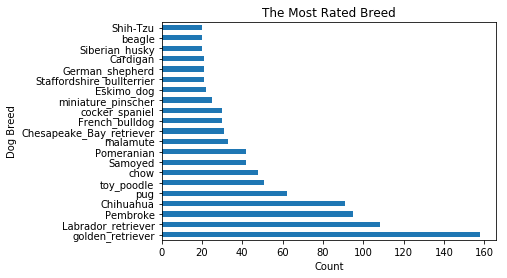

In [46]:
#the most rated breed of dog, limiting ourselves to top 20 with most counts
breed_rating = df_merge2.groupby('predicted_breed').filter(lambda x: len(x) >= 20)

breed_rating['predicted_breed'].value_counts().plot(kind = 'barh')
plt.title('The Most Rated Breed')
plt.xlabel('Count')
plt.ylabel('Dog Breed')

It looks here that there were much more tweets of golden retrievers than any other breeds.

### 2.  What breed has been "favorite" the most?

Text(0.5,0,'Breed')

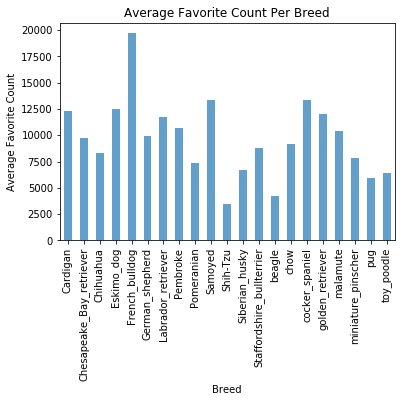

In [64]:
#again mostly focusing on top 20 breeds
breed_rating.groupby('predicted_breed')['favorite_count'].mean().plot(kind='bar',title= 'Average Favorite Count Per Breed',  alpha=.7);
plt.ylabel("Average Favorite Count")
plt.xlabel("Breed")

There might've been more tweets of Golden-Retrivers but it seems that French Bulldog has the most average favorite counts.

### 3.  Do pupper tweets have the highest average rating?
#### Because the smaller.. the cuter, no?

Text(0.5,0,'Stage')

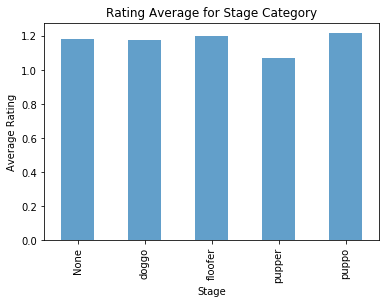

In [65]:
df_merge2.groupby('stage')['ratings'].mean().plot(kind='bar',title= 'Rating Average for Stage Category', alpha=.7);
plt.ylabel("Average Rating")
plt.xlabel('Stage')

Although some data is lost through the "None" entry, it seems that puppo have the highest average rating, followed by floofer. Just to make sure, lets look at the numbers.

In [52]:
#looking at the numbers
df_merge2.groupby('stage')['ratings'].mean()

stage
None       1.181334
doggo      1.179710
floofer    1.200000
pupper     1.075105
puppo      1.217241
Name: ratings, dtype: float64

Seems like puppo is the most highly rated, but floofer is very close behind.

Now lets look at trends between retweet and favorite counts.

### 4. Does more retweet count mean more favorite count?

Text(0.5,1,'Retweets vs Favorites Trend Scatter Plot')

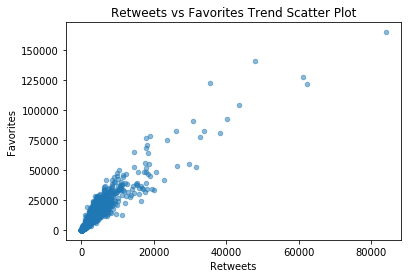

In [66]:
#retweet vs favorite trend
df_merge2.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', alpha = 0.5)
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Retweets vs Favorites Trend Scatter Plot')

We can see a positive correlation between the two. However we need a clearer graph. Lets take the log.

In [67]:
#looking at the log of retweet vs favorite count trend
to_log = ['favorite_count', 'retweet_count']
df_logged = df_merge2[to_log].applymap(lambda x: np.log10(x))

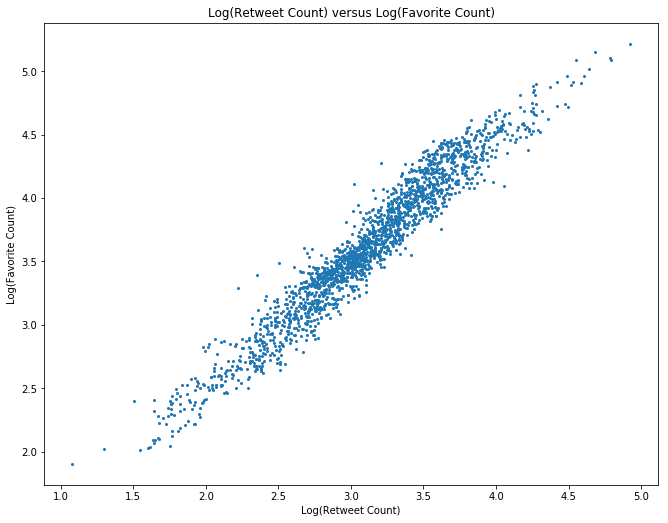

In [68]:
#plot the log grapj
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.retweet_count, df_logged.favorite_count, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Retweet Count)')
plt.ylabel('Log(Favorite Count)')
plt.show()



Now the positive relationship is much more clearer. It is obvious there is a positive correlation between the two. A possible explanation could be that more retweets leads to more exposure and so more opportunity for tweets to be favorited.

# Conclusion

This leads to the end of our data wrangling. From gathering the data, to its assessment and finally cleaning it has been a bumpy ride. 

We can conclude that athough we had a much more tweets of golden retrievers, the french bulldogs seem to get much more favorite counts. We also learned that the younger stage the dog doesnt necessarily mean a higher rating.

And finally, higher retweet count would most probably get a tweet more favorite count.